In [4]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

[*********************100%***********************]  1 of 1 completed


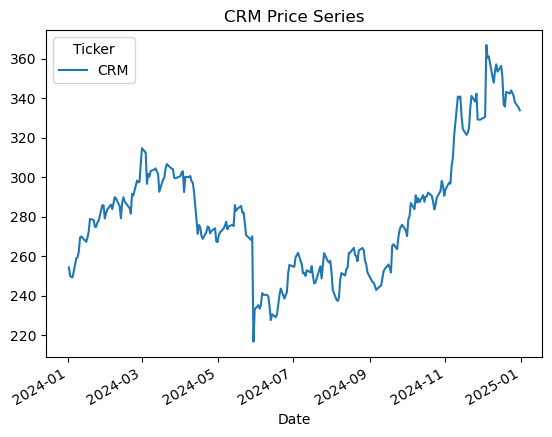

In [9]:
ticker = "CRM"
data = yf.download(ticker, start="2024-01-01", end="2025-01-01")
prices = data['Close']
prices.plot(title=f"{ticker} Price Series")
plt.show()

In [10]:
prices = data['Close'].squeeze()  # converts pd dataframe into a series

price_diff = prices.diff().dropna()
log_returns = np.log(prices / prices.shift(1)).dropna()


In [14]:
from scipy.stats import shapiro, kstest, zscore

def test_normality(data, label="Data"):

    # Shapiro-Wilk Test
    stat_shapiro, p_shapiro = shapiro(data)
    result_shapiro = "likely normal" if p_shapiro > 0.05 else "not normal"
    print(f"Shapiro-Wilk Test: p-value = {p_shapiro:.4f} -> {result_shapiro} (95% confidence)")

    # Kolmogorov-Smirnov Test (standardize data first)
    stat_ks, p_ks = kstest(zscore(data), 'norm')
    result_ks = "likely normal" if p_ks > 0.05 else "not normal"
    print(f"Kolmogorov-Smirnov Test: p-value = {p_ks:.4f} -> {result_ks} (95% confidence)")

# Example usage
test_normality(price_diff, label="Price Differences")
test_normality(log_returns, label="Log Returns")

Shapiro-Wilk Test: p-value = 0.0000 -> not normal (95% confidence)
Kolmogorov-Smirnov Test: p-value = 0.0006 -> not normal (95% confidence)
Shapiro-Wilk Test: p-value = 0.0000 -> not normal (95% confidence)
Kolmogorov-Smirnov Test: p-value = 0.0007 -> not normal (95% confidence)


In [8]:
mu_diff, std_diff = norm.fit(price_diff)
mu_log, std_log = norm.fit(log_returns)


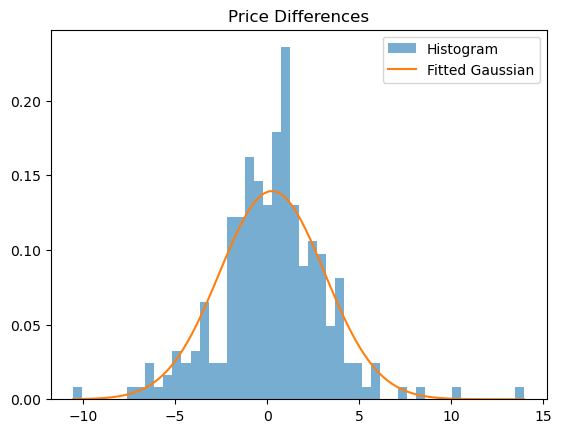

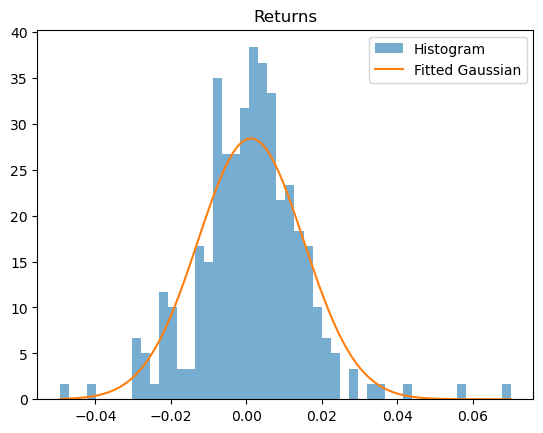

In [24]:


# Price differences
plt.hist(price_diff, bins=50, density=True, alpha=0.6, label="Histogram")
x = np.linspace(price_diff.min(), price_diff.max(), 100)
plt.plot(x, norm.pdf(x, mu_diff, std_diff), label="Fitted Gaussian")
plt.title("Price Differences")
plt.legend()
plt.show()

# Log Returns
plt.hist(log_returns, bins=50, density=True, alpha=0.6, label="Histogram")
x = np.linspace(log_returns.min(), log_returns.max(), 100)
plt.plot(x, norm.pdf(x, mu_log, std_log), label="Fitted Gaussian")
plt.title("Returns")
plt.legend()
plt.show()

In [ ]:
n_days = len(prices)
n_paths = 5
initial_price = prices.iloc[0]



Bachelier Formula

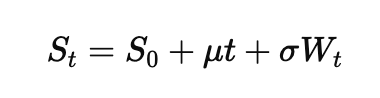

In [ ]:
bachelier_paths = [np.cumsum(np.random.normal(mu_diff, std_diff, n_days)) + initial_price for _ in range(n_paths)]


Samuelson Formula

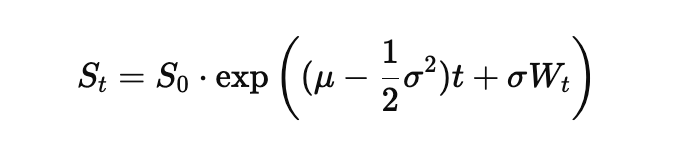

In [ ]:
samuelson_paths = [
    initial_price * np.exp(np.cumsum(np.random.normal(mu_log, std_log, n_days)))
    for _ in range(n_paths)
]
#samuelson_paths = [initial_price * np.cumprod(np.random.normal(1+mu_log, std_log, n_days)) for _ in range(n_paths)]


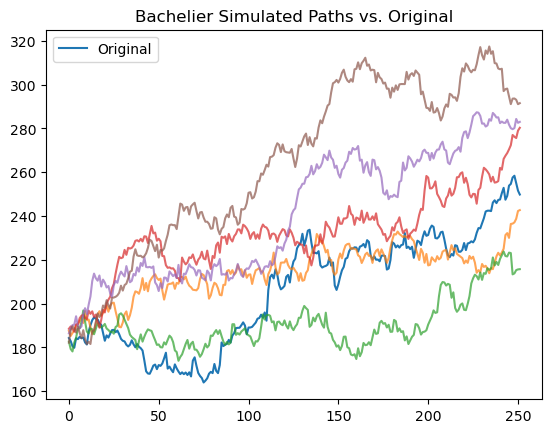

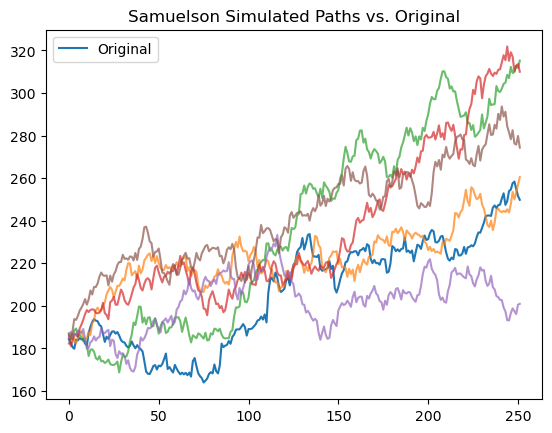

In [26]:
plt.plot(prices.values, label="Original")
for path in bachelier_paths:
    plt.plot(path, alpha=0.7)
plt.title("Bachelier Simulated Paths vs. Original")
plt.legend()
plt.show()

plt.plot(prices.values, label="Original")
for path in samuelson_paths:
    plt.plot(path, alpha=0.7)
plt.title("Samuelson Simulated Paths vs. Original")
plt.legend()
plt.show()


In [27]:

b_arr = np.vstack(bachelier_paths)      # shape = (n_paths, n_days)
s_arr = np.vstack(samuelson_paths)     # shape = (n_paths, n_days)

mean_bachelier   = b_arr.mean(axis=0)  
mean_samuelson  = s_arr.mean(axis=0)   


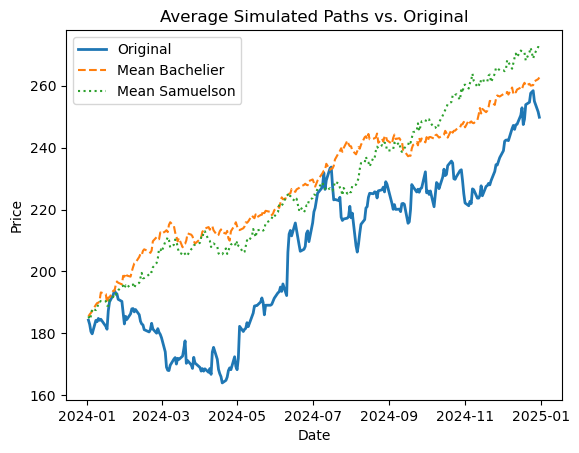

In [28]:
plt.plot(prices.index, prices ,label="Original",lw=2)
plt.plot(prices.index, mean_bachelier,  linestyle='--', label="Mean Bachelier")
plt.plot(prices.index, mean_samuelson, linestyle=':',  label="Mean Samuelson")
plt.legend()
plt.title("Average Simulated Paths vs. Original")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()
